In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/kirtan/Downloads/playground-series-s3e17/train.csv')

In [3]:
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [4]:
df.shape

(136429, 14)

In [5]:
df = df.drop(columns='id',axis=1)

In [6]:
df.columns

Index(['Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Product ID               136429 non-null  object 
 1   Type                     136429 non-null  object 
 2   Air temperature [K]      136429 non-null  float64
 3   Process temperature [K]  136429 non-null  float64
 4   Rotational speed [rpm]   136429 non-null  int64  
 5   Torque [Nm]              136429 non-null  float64
 6   Tool wear [min]          136429 non-null  int64  
 7   Machine failure          136429 non-null  int64  
 8   TWF                      136429 non-null  int64  
 9   HDF                      136429 non-null  int64  
 10  PWF                      136429 non-null  int64  
 11  OSF                      136429 non-null  int64  
 12  RNF                      136429 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 13.5+ MB


In [8]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(df[col].unique())

['L50096' 'M20343' 'L49454' ... 'M18739' 'L50940' 'L48036']
['L' 'M' 'H']


In [9]:
df = df.drop(columns='Product ID',axis=1)

In [10]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [11]:
df.isnull().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [12]:
column_name = ['Machine failure','TWF','HDF','PWF','OSF','RNF']

In [13]:
for col in column_name:
    print(df[col].unique())

[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Type                     136429 non-null  object 
 1   Air temperature [K]      136429 non-null  float64
 2   Process temperature [K]  136429 non-null  float64
 3   Rotational speed [rpm]   136429 non-null  int64  
 4   Torque [Nm]              136429 non-null  float64
 5   Tool wear [min]          136429 non-null  int64  
 6   Machine failure          136429 non-null  int64  
 7   TWF                      136429 non-null  int64  
 8   HDF                      136429 non-null  int64  
 9   PWF                      136429 non-null  int64  
 10  OSF                      136429 non-null  int64  
 11  RNF                      136429 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 12.5+ MB


# Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
LE = LabelEncoder()

In [17]:
df['Type'] = LE.fit_transform(df['Type'])

In [18]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,2,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,1,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,1,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,2,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


# Data Visualization

Plotting histogram of Air temperature

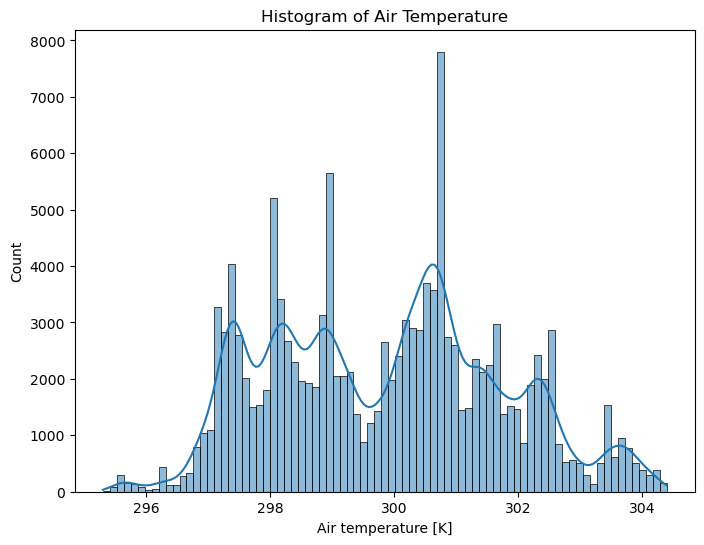

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Air temperature [K]', kde=True)
plt.title('Histogram of Air Temperature')
plt.xlabel('Air temperature [K]')
plt.ylabel('Count')
plt.show()

Plotting scatter plot of Process temperature vs. Tool wear

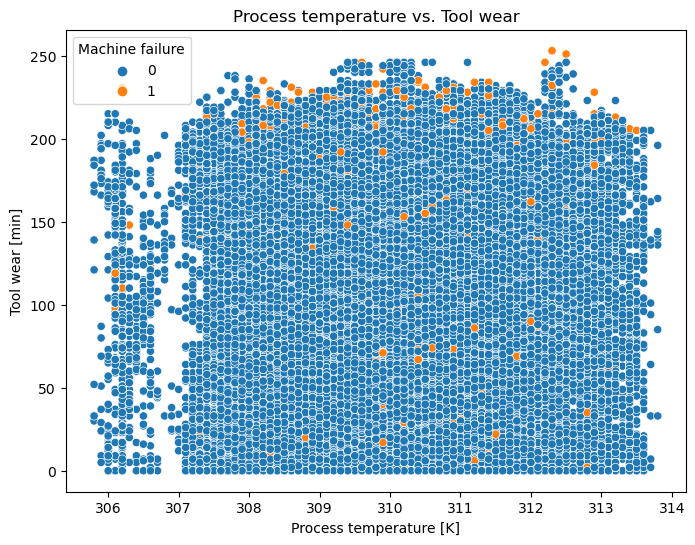

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Process temperature [K]', y='Tool wear [min]', hue='Machine failure')
plt.title('Process temperature vs. Tool wear')
plt.xlabel('Process temperature [K]')
plt.ylabel('Tool wear [min]')
plt.show()

Plotting box plot of Torque

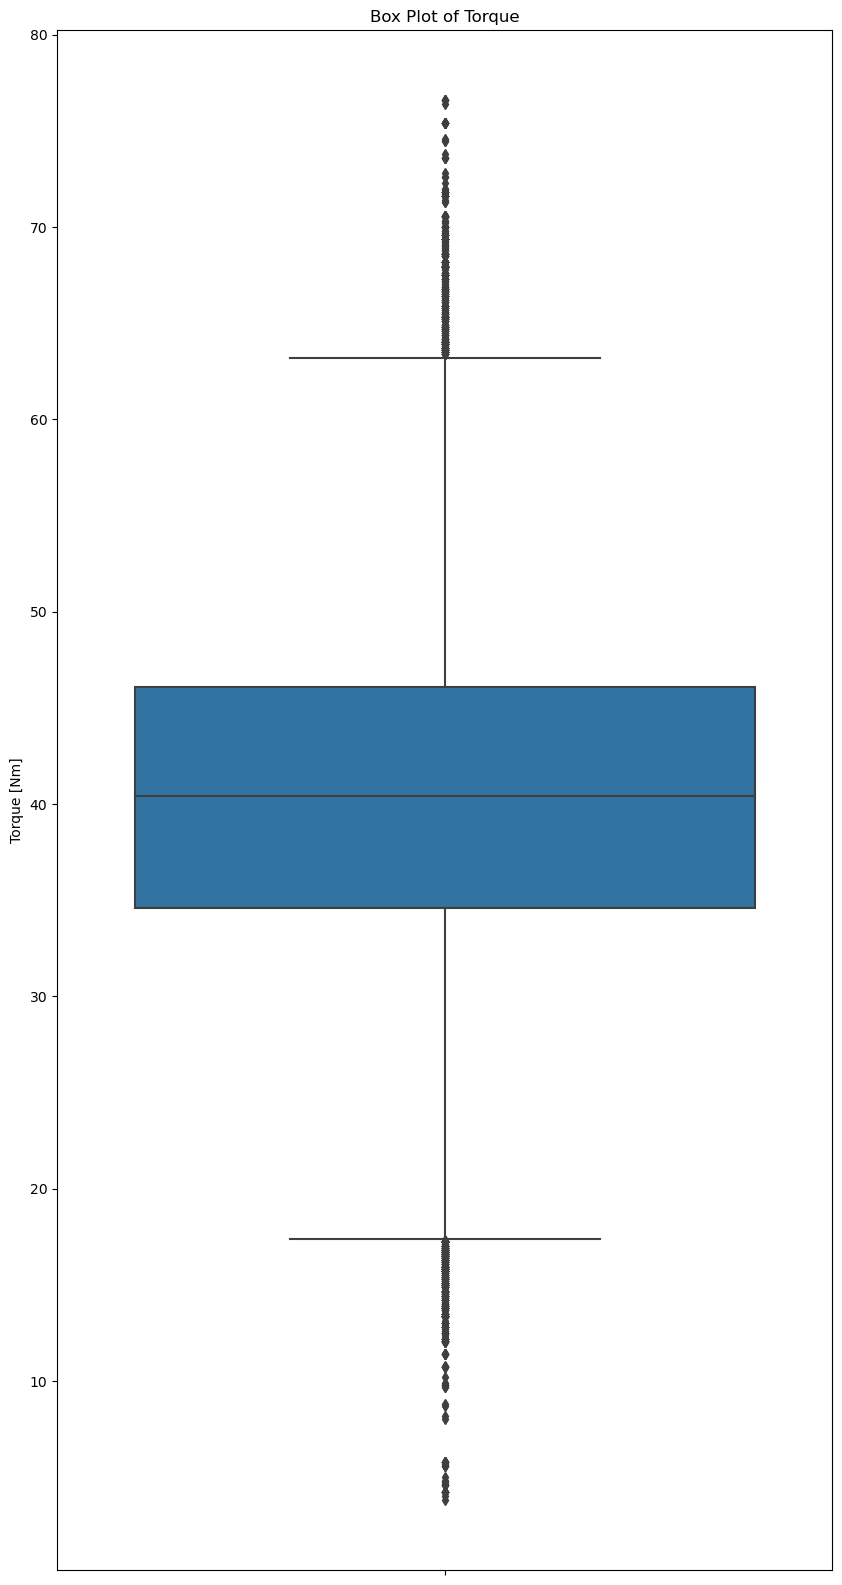

In [21]:
plt.figure(figsize=(10, 20))
sns.boxplot(data=df, y='Torque [Nm]')
plt.title('Box Plot of Torque')
plt.ylabel('Torque [Nm]')
plt.show()

Plotting count plot of Machine failure

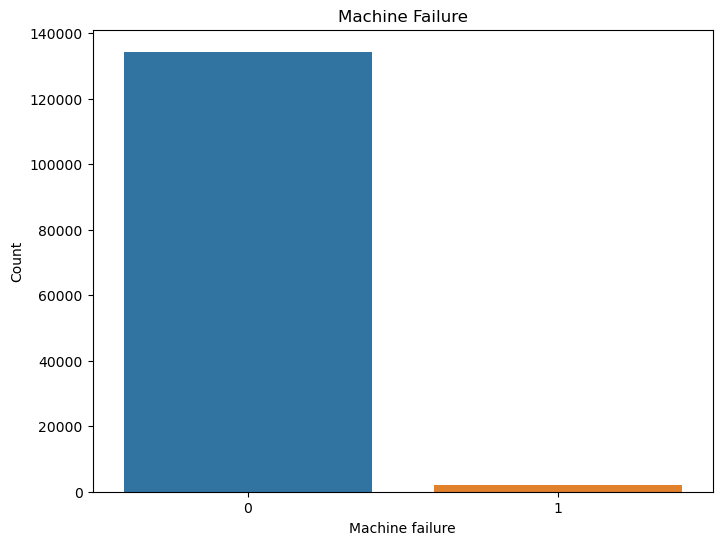

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Machine failure')
plt.title('Machine Failure')
plt.xlabel('Machine failure')
plt.ylabel('Count')
plt.show()

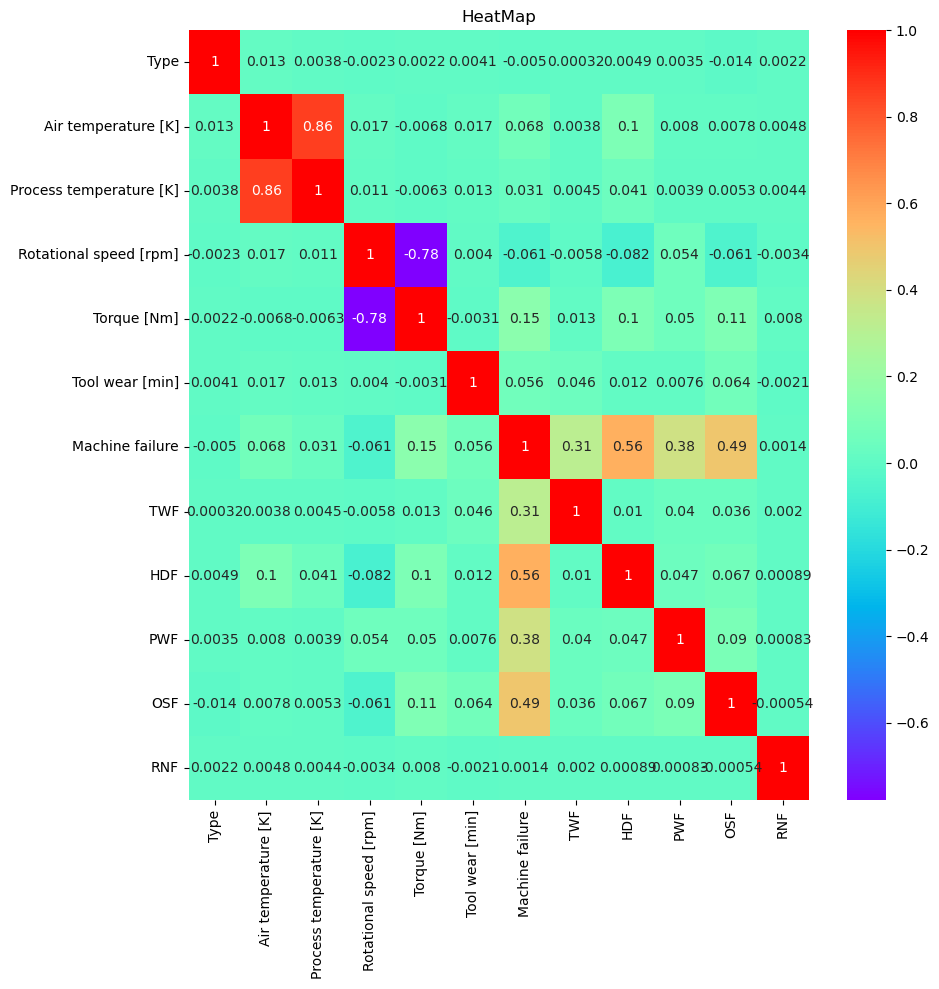

In [23]:
Corr = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(Corr,annot=True,cmap='rainbow')
plt.title('HeatMap')
plt.show()

# Train & Test Split

In [24]:
X = df.drop(columns='Machine failure',axis=1)
X

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,1,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,2,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,1,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,1,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,2,298.0,309.0,1641,35.4,34,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
136424,2,300.1,311.4,1530,37.5,210,0,0,0,0,0
136425,0,297.5,308.5,1447,49.1,2,0,0,0,0,0
136426,1,300.5,311.8,1524,38.5,214,0,0,0,0,0
136427,1,301.7,310.9,1447,46.3,42,0,0,0,0,0


In [25]:
y = df['Machine failure']
y

0         0
1         0
2         0
3         0
4         0
         ..
136424    0
136425    0
136426    0
136427    0
136428    0
Name: Machine failure, Length: 136429, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# RandomForest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
RNF = RandomForestClassifier()

In [30]:
RNF.fit(X_train,y_train)

RandomForestClassifier()

Prediction

In [31]:
y_hat = RNF.predict(X_test)

Model Evaluation

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
print(accuracy_score(y_test,y_hat))

0.9960419262625523


In [34]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26848
           1       0.98      0.77      0.86       438

    accuracy                           1.00     27286
   macro avg       0.99      0.88      0.93     27286
weighted avg       1.00      1.00      1.00     27286



In [35]:
print(confusion_matrix(y_test,y_hat))

[[26842     6]
 [  102   336]]


# Submission

In [36]:
test_df = pd.read_csv('/Users/kirtan/Downloads/playground-series-s3e17/test.csv')

In [37]:
test_df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [38]:
test_X = test_df.drop(columns='id',axis=1)

In [39]:
test_X.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [40]:
test_X = test_X.drop(columns='Product ID',axis=1)

In [41]:
test_X['Type'] = LE.transform(test_X['Type'])

In [42]:
prediction = RNF.predict(test_X)

In [43]:
df_predictions = pd.DataFrame({'id':test_df['id'],'Machine failure': prediction})

In [44]:
df_predictions

,id,Machine failure
0,136429,0
1,136430,0
2,136431,0
3,136432,0
4,136433,0
...,...,...
90949,227378,0
90950,227379,0
90951,227380,0
90952,227381,0
